In [2]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [3]:
# Load the weather dataset

weather = pd.read_csv(r"C:\Users\Admin\Downloads\Raju Sir DLS\weather.csv", header=0)
weather.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,20,68,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,17,80,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,6,82,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,24,62,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,28,68,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [4]:
# Display the dataset information

weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

In [5]:
# Identify the missing data in all variables

weather.isnull().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

In [6]:
# functions for better visualization of the posterior plots

def resizeplot():
    plt.figure(figsize=(12,6))
    
# function for correlations plots

def resizecorr():
    plt.figure(figsize=(15,7))

<AxesSubplot:>

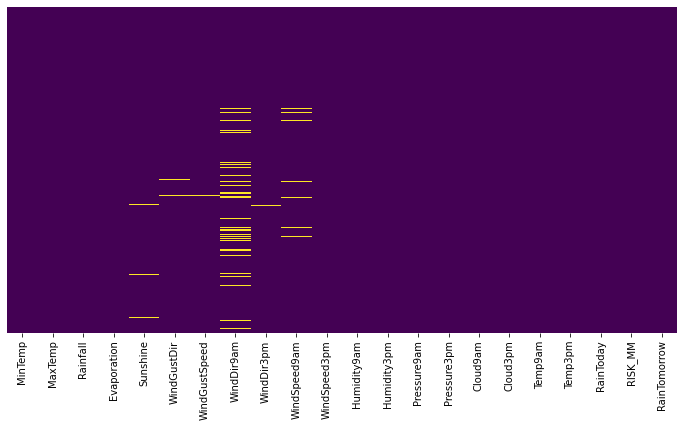

In [7]:
# Visualize missing data in graph

resizeplot()
sns.heatmap(weather.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
# Use KNNImputer to address missing values

from sklearn.impute import KNNImputer

imputer_int = KNNImputer(missing_values=np.nan, n_neighbors=5, weights='uniform', metric='nan_euclidean',
                         copy=True, add_indicator=False)

weather['Sunshine'] = imputer_int.fit_transform(weather[['Sunshine']])

In [9]:
# Use SimpleImputer to address missing values

from sklearn.impute import SimpleImputer

imputer_str = SimpleImputer(missing_values=np.nan, strategy='most_frequent', fill_value=None, verbose=0,
                            copy=True, add_indicator=False)

weather['WindGustDir'] = imputer_str.fit_transform(weather[['WindGustDir']])
weather['WindGustSpeed'] = imputer_int.fit_transform(weather[['WindGustSpeed']])
weather['WindDir9am'] = imputer_str.fit_transform(weather[['WindDir9am']])
weather['WindDir3pm'] = imputer_str.fit_transform(weather[['WindDir3pm']])
weather['WindSpeed9am'] = imputer_int.fit_transform(weather[['WindSpeed9am']])

<AxesSubplot:>

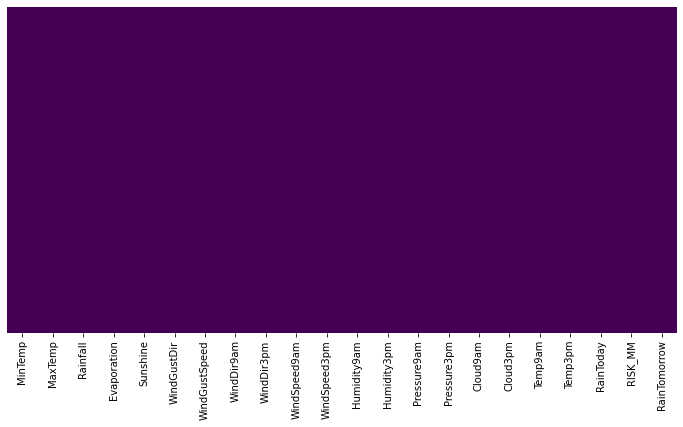

In [10]:
# Check the Visualize of missing data in graph after impute technique

resizeplot()
sns.heatmap(weather.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
# Drop the RISK_MM variable

weather.drop('RISK_MM', inplace=True,axis=1)
weather.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,20,68,29,1019.7,1015.0,7,7,14.4,23.6,No,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,17,80,36,1012.4,1008.4,5,3,17.5,25.7,Yes,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,6,82,69,1009.5,1007.2,8,7,15.4,20.2,Yes,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,24,62,56,1005.5,1007.0,2,7,13.5,14.1,Yes,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,28,68,49,1018.3,1018.5,7,7,11.1,15.4,Yes,No


In [12]:
# "groupby" we have important information about the possible conditions that may or may not cause rain condition

weather[['Rainfall','Sunshine','Evaporation','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am',
         'Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am',
         'Temp3pm']].groupby(weather['RainToday']).mean()

,Rainfall,Sunshine,Evaporation,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
RainToday,,,,,,,,,,,,,,
No,0.056667,8.179729,4.562667,38.682271,8.683036,17.640000,70.783333,41.996667,1020.812000,1017.658667,3.593333,3.906667,12.126333,19.456000
Yes,7.663636,6.680445,4.336364,45.106061,14.055330,19.560606,77.727273,55.984848,1014.695455,1012.954545,5.242424,4.560606,13.413636,18.207576


In [13]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       366 non-null    float64
 5   WindGustDir    366 non-null    object 
 6   WindGustSpeed  366 non-null    float64
 7   WindDir9am     366 non-null    object 
 8   WindDir3pm     366 non-null    object 
 9   WindSpeed9am   366 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

In [14]:
# Use LabelBinarizer to handle categorical data

from sklearn.preprocessing import LabelBinarizer

LB = LabelBinarizer()

weather['WindGustDir'] = LB.fit_transform(weather[['WindGustDir']])
weather['WindDir9am'] = LB.fit_transform(weather[['WindDir9am']])
weather['WindDir3pm'] = LB.fit_transform(weather[['WindDir3pm']])

In [15]:
# Use LabelEncoder for target variables

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

weather['RainToday'] = LE.fit_transform(weather['RainToday'])
weather['RainTomorrow'] = LE.fit_transform(weather['RainTomorrow'])

In [16]:
weather.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,0,30.0,0,0,6.0,20,68,29,1019.7,1015.0,7,7,14.4,23.6,0,1
1,14.0,26.9,3.6,4.4,9.7,0,39.0,1,0,4.0,17,80,36,1012.4,1008.4,5,3,17.5,25.7,1,1
2,13.7,23.4,3.6,5.8,3.3,0,85.0,0,0,6.0,6,82,69,1009.5,1007.2,8,7,15.4,20.2,1,1
3,13.3,15.5,39.8,7.2,9.1,0,54.0,0,0,30.0,24,62,56,1005.5,1007.0,2,7,13.5,14.1,1,1
4,7.6,16.1,2.8,5.6,10.6,0,50.0,0,0,20.0,28,68,49,1018.3,1018.5,7,7,11.1,15.4,1,0


In [17]:
# Identify the independent and Target variables

IndepVar = []
for col in weather.columns:
    if col != 'RainTomorrow':
        IndepVar.append(col)

TargetVar = 'RainTomorrow'

x = weather[IndepVar]
y = weather[TargetVar]

In [18]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

# Copy the test data to backup file

x_test_BK = x_test.copy()

In [19]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

In [21]:
# Load the Result dataset

Results = pd.read_csv(r"C:\Users\Admin\Downloads\Raju Sir DLS\Result_OutFile-01.csv", header=0)
Results.head()

,Model Name,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# Classification models and compare the results

Model Name:  LogisticRegression()
Confusion matrix : 
 [[11  7]
 [ 5 87]]
Outcome values : 
 11 7 5 87
Classification report : 
               precision    recall  f1-score   support

           1       0.69      0.61      0.65        18
           0       0.93      0.95      0.94        92

    accuracy                           0.89       110
   macro avg       0.81      0.78      0.79       110
weighted avg       0.89      0.89      0.89       110

Accuracy : 89.1 %
Precision : 68.8 %
Recall : 61.1 %
F1 Score : 0.647
Specificity or True Negative Rate : 94.6 %
Balanced Accuracy : 77.8 %
MCC : 0.584
roc_auc_score: 0.778


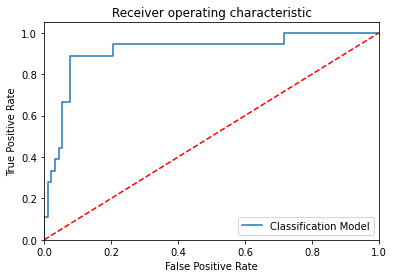

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[11  7]
 [17 75]]
Outcome values : 
 11 7 17 75
Classification report : 
               precision    recall  f1-score   support

           1       0.39      0.61      0.48        18
           0       0.91      0.82      0.86        92

    accuracy                           0.78       110
   macro avg       0.65      0.71      0.67       110
weighted avg       0.83      0.78      0.80       110

Accuracy : 78.2 %
Precision : 39.3 %
Recall : 61.1 %
F1 Score : 0.478
Specificity or True Negative Rate : 81.5 %
Balanced Accuracy : 71.3 %
MCC : 0.362
roc_auc_score: 0.713


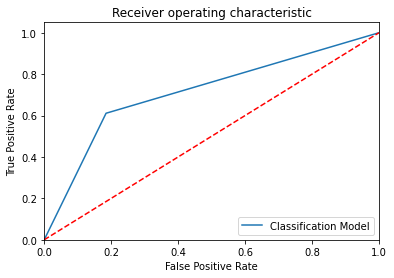

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[10  8]
 [ 5 87]]
Outcome values : 
 10 8 5 87
Classification report : 
               precision    recall  f1-score   support

           1       0.67      0.56      0.61        18
           0       0.92      0.95      0.93        92

    accuracy                           0.88       110
   macro avg       0.79      0.75      0.77       110
weighted avg       0.88      0.88      0.88       110

Accuracy : 88.2 %
Precision : 66.7 %
Recall : 55.6 %
F1 Score : 0.606
Specificity or True Negative Rate : 94.6 %
Balanced Accuracy : 75.1 %
MCC : 0.54
roc_auc_score: 0.751


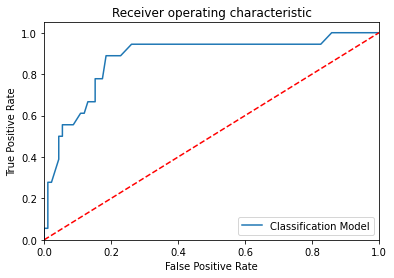

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[10  8]
 [ 3 89]]
Outcome values : 
 10 8 3 89
Classification report : 
               precision    recall  f1-score   support

           1       0.77      0.56      0.65        18
           0       0.92      0.97      0.94        92

    accuracy                           0.90       110
   macro avg       0.84      0.76      0.79       110
weighted avg       0.89      0.90      0.89       110

Accuracy : 90.0 %
Precision : 76.9 %
Recall : 55.6 %
F1 Score : 0.645
Specificity or True Negative Rate : 96.7 %
Balanced Accuracy : 76.2 %
MCC : 0.599
roc_auc_score: 0.761


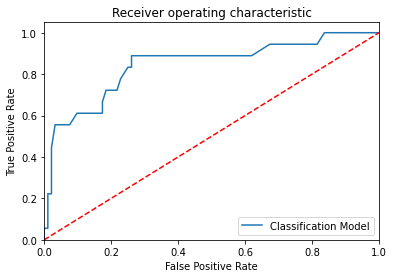

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[ 6 12]
 [ 5 87]]
Outcome values : 
 6 12 5 87
Classification report : 
               precision    recall  f1-score   support

           1       0.55      0.33      0.41        18
           0       0.88      0.95      0.91        92

    accuracy                           0.85       110
   macro avg       0.71      0.64      0.66       110
weighted avg       0.82      0.85      0.83       110

Accuracy : 84.5 %
Precision : 54.5 %
Recall : 33.3 %
F1 Score : 0.414
Specificity or True Negative Rate : 94.6 %
Balanced Accuracy : 64.0 %
MCC : 0.344
roc_auc_score: 0.639


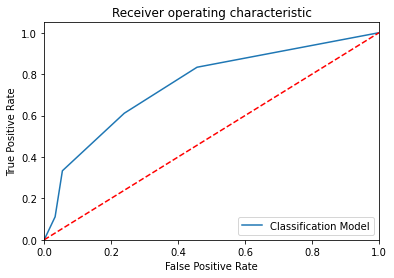

-----------------------------------------------------------------------------------------------------
Model Name:  MLPClassifier()
Confusion matrix : 
 [[14  4]
 [ 9 83]]
Outcome values : 
 14 4 9 83
Classification report : 
               precision    recall  f1-score   support

           1       0.61      0.78      0.68        18
           0       0.95      0.90      0.93        92

    accuracy                           0.88       110
   macro avg       0.78      0.84      0.81       110
weighted avg       0.90      0.88      0.89       110

Accuracy : 88.2 %
Precision : 60.9 %
Recall : 77.8 %
F1 Score : 0.683
Specificity or True Negative Rate : 90.2 %
Balanced Accuracy : 84.0 %
MCC : 0.619
roc_auc_score: 0.84


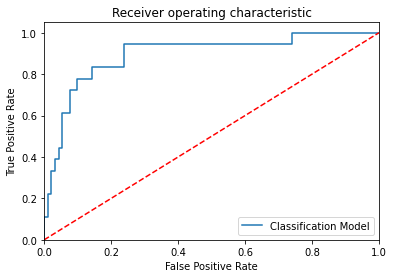

-----------------------------------------------------------------------------------------------------
Model Name:  GradientBoostingClassifier()
Confusion matrix : 
 [[11  7]
 [ 8 84]]
Outcome values : 
 11 7 8 84
Classification report : 
               precision    recall  f1-score   support

           1       0.58      0.61      0.59        18
           0       0.92      0.91      0.92        92

    accuracy                           0.86       110
   macro avg       0.75      0.76      0.76       110
weighted avg       0.87      0.86      0.87       110

Accuracy : 86.4 %
Precision : 57.9 %
Recall : 61.1 %
F1 Score : 0.595
Specificity or True Negative Rate : 91.3 %
Balanced Accuracy : 76.2 %
MCC : 0.513
roc_auc_score: 0.762


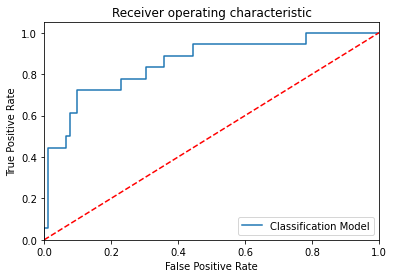

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[15  3]
 [21 71]]
Outcome values : 
 15 3 21 71
Classification report : 
               precision    recall  f1-score   support

           1       0.42      0.83      0.56        18
           0       0.96      0.77      0.86        92

    accuracy                           0.78       110
   macro avg       0.69      0.80      0.71       110
weighted avg       0.87      0.78      0.81       110

Accuracy : 78.2 %
Precision : 41.7 %
Recall : 83.3 %
F1 Score : 0.556
Specificity or True Negative Rate : 77.2 %
Balanced Accuracy : 80.2 %
MCC : 0.477
roc_auc_score: 0.803


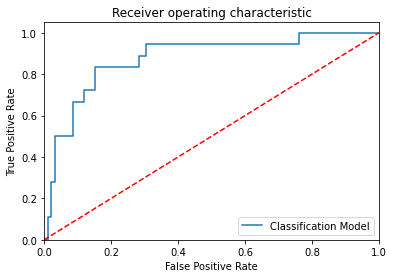

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(probability=True)
Confusion matrix : 
 [[ 8 10]
 [ 5 87]]
Outcome values : 
 8 10 5 87
Classification report : 
               precision    recall  f1-score   support

           1       0.62      0.44      0.52        18
           0       0.90      0.95      0.92        92

    accuracy                           0.86       110
   macro avg       0.76      0.70      0.72       110
weighted avg       0.85      0.86      0.85       110

Accuracy : 86.4 %
Precision : 61.5 %
Recall : 44.4 %
F1 Score : 0.516
Specificity or True Negative Rate : 94.6 %
Balanced Accuracy : 69.5 %
MCC : 0.447
roc_auc_score: 0.695


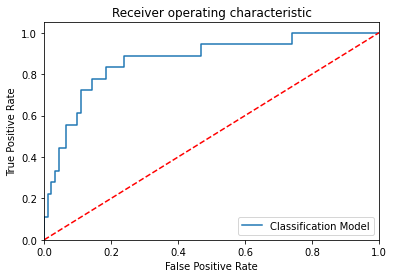

-----------------------------------------------------------------------------------------------------


In [22]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelMLP = MLPClassifier()
ModelGB = GradientBoostingClassifier()
ModelGNB = GaussianNB()
ModelSVM = SVC(probability=True)

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelMLP, ModelGB, ModelGNB, ModelSVM]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    #--------------------------------------------------------
    new_row = {'Model Name' : models,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(y_test, y_pred),
               'Balanced Accuracy':balanced_accuracy}
    Results = Results.append(new_row, ignore_index=True)
    #--------------------------------------------------------
    print('-----------------------------------------------------------------------------------------------------')

In [26]:
Results.to_csv("C:/Users/Admin/Downloads/Raju Sir DLS/Result_OutFile-09.csv")
Results.head(10)

,Model Name,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),0.891,0.688,0.611,0.647,0.946,0.584,0.778382,0.778
1,DecisionTreeClassifier(),0.782,0.393,0.611,0.478,0.815,0.362,0.713164,0.713
2,"(DecisionTreeClassifier(max_features='sqrt', r...",0.882,0.667,0.556,0.606,0.946,0.54,0.750604,0.751
3,"(ExtraTreeClassifier(random_state=2116551055),...",0.9,0.769,0.556,0.645,0.967,0.599,0.761473,0.762
4,KNeighborsClassifier(),0.845,0.545,0.333,0.414,0.946,0.344,0.639493,0.64
5,MLPClassifier(),0.882,0.609,0.778,0.683,0.902,0.619,0.839976,0.84
6,([DecisionTreeRegressor(criterion='friedman_ms...,0.864,0.579,0.611,0.595,0.913,0.513,0.762077,0.762
7,GaussianNB(),0.782,0.417,0.833,0.556,0.772,0.477,0.802536,0.802
8,SVC(probability=True),0.864,0.615,0.444,0.516,0.946,0.447,0.695048,0.695
